In [1]:
import pandas as pd
import os
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import ast
import seaborn as sns



In [2]:
path = os.getcwd()
file_list = []
for f in os.listdir(path):
        full_path = os.path.join(path, f)
        if os.path.isfile(full_path):
            file_list.append(f)


1. transactions.csv


In [4]:
transactions = pd.read_csv('transactions.csv')


In [5]:
transactions.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


In [6]:
transactions.tail()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
852579,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"[{'product_id': 30642, 'quantity': 2, 'item_pr...",Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820
852580,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"[{'product_id': 19394, 'quantity': 1, 'item_pr...",OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203
852581,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"[{'product_id': 13079, 'quantity': 4, 'item_pr...",Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159
852582,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"[{'product_id': 11312, 'quantity': 1, 'item_pr...",Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143
852583,2019-12-19T12:47:14.701215Z,58180,b242e188-5f94-4448-a038-c5865842374b,5e3183df-198b-40e0-b861-27ef694a832a,"[{'product_id': 47433, 'quantity': 1, 'item_pr...",Gopay,Success,4724,BUYMORE,10000,2019-12-23T06:02:05.828334Z,-6.155983,106.723535,365963


In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [8]:
transactions.describe()

,customer_id,promo_amount,shipment_fee,shipment_location_lat,shipment_location_long,total_amount
count,852584.000000,852584.000000,852584.000000,852584.000000,852584.000000,8.525840e+05
mean,49839.202245,2042.077949,9189.675152,-5.111961,110.966216,5.499165e+05
std,28999.324142,3063.481424,9377.856335,3.081469,6.398510,8.153761e+05
min,3.000000,0.000000,0.000000,-10.995516,95.030728,1.089800e+04
25%,24563.000000,0.000000,0.000000,-7.377923,106.863926,2.037938e+05
50%,49619.000000,0.000000,10000.000000,-6.241318,110.168478,3.029890e+05
75%,74957.000000,3993.000000,10000.000000,-3.088419,113.194940,5.147022e+05
max,99999.000000,24519.000000,50000.000000,5.874791,141.006140,2.350449e+07


In [9]:
transactions["booking_id"].nunique()

852584

In [10]:
transactions['product_metadata'].isna().sum()

0

In [11]:
transactions[transactions['product_metadata'].str.strip().isin(['', 'None', '0', '?'])]

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount


In [12]:
transactions["created_at"] = pd.to_datetime(transactions["created_at"])
transactions["created_at"] = transactions["created_at"].dt.floor("s")

In [13]:
transactions['payment_method'].isna().sum()

0

In [14]:
transactions[transactions['payment_method'].str.strip().isin(['', 'None', '0', '?'])]

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount


In [15]:
transactions['payment_method'].value_counts()

payment_method
Credit Card    299586
Gopay          171334
OVO            169066
Debit Card     137269
LinkAja         75329
Name: count, dtype: int64

In [16]:
transactions['payment_status'].isna().sum()

0

In [17]:
transactions["promo_flag"] = (transactions["promo_amount"] > 0).astype(int)

In [18]:
pivot = transactions.pivot_table(
    index='shipment_fee',
    values='booking_id',
    aggfunc='count'
)
print(pivot.sort_values('shipment_fee'))

              booking_id
shipment_fee            
0                 220605
5000               58896
10000             461089
15000              56205
25000              28117
50000              27672


<Axes: xlabel='created_at'>

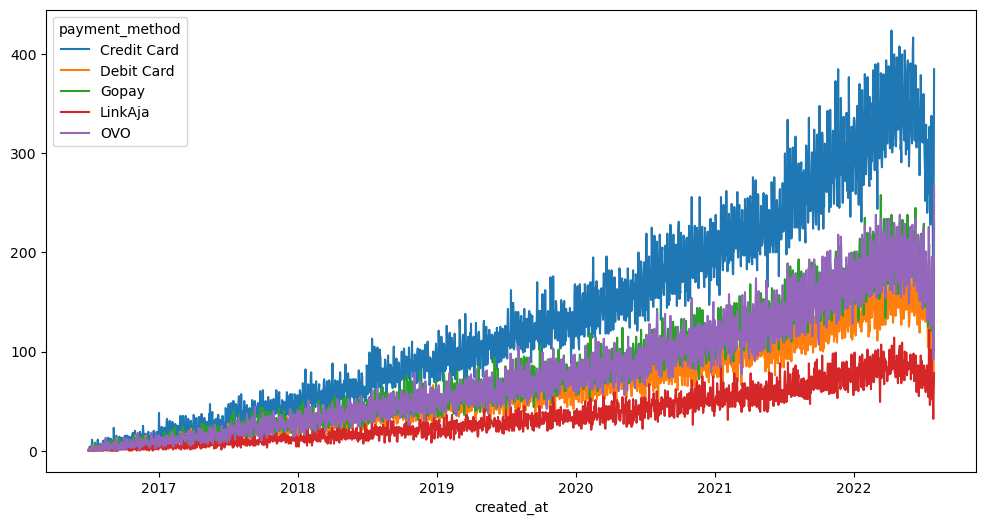

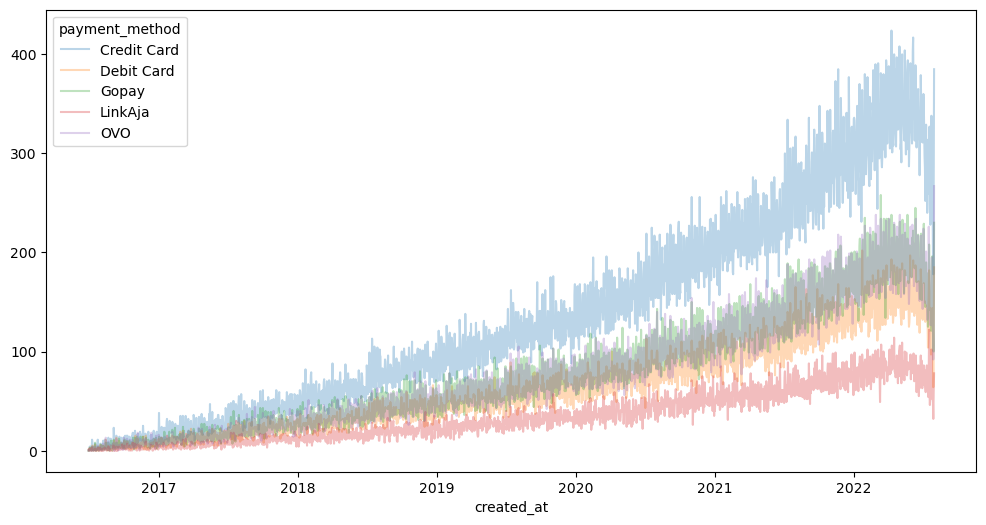

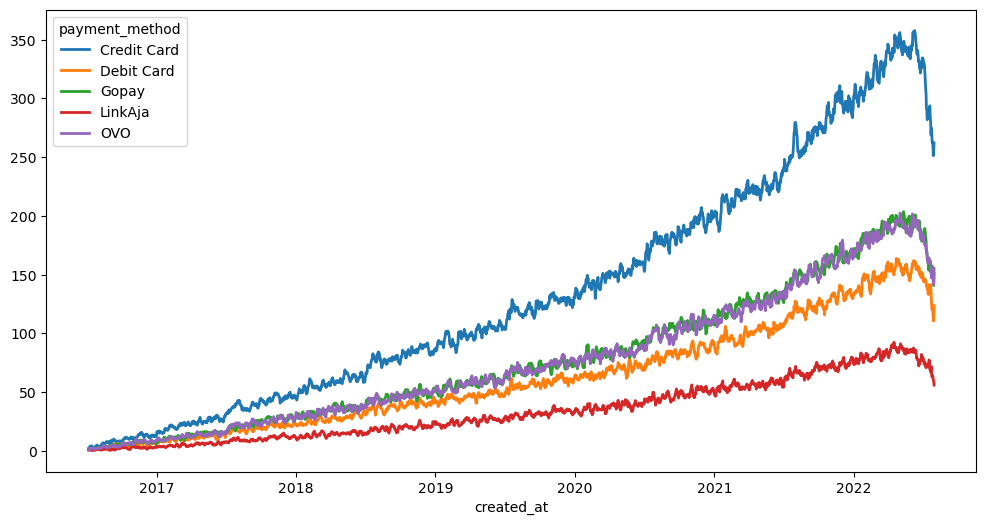

In [19]:
pm_time = (transactions
           .groupby([transactions['created_at'].dt.date, 'payment_method'])
           .size()
           .unstack(fill_value=0))

pm_time.head()

pm_time.plot(figsize=(12,6))
pm_time_rolling = pm_time.rolling(window=7).mean() # smoothing by week
pm_time.plot(figsize=(12.6), alpha=0.3) # real values
pm_time_rolling.plot(figsize=(12.6), linewidth=2) # trend

In [25]:
transactions['has_promo'] = (transactions['promo_amount'] > 0).astype(int)


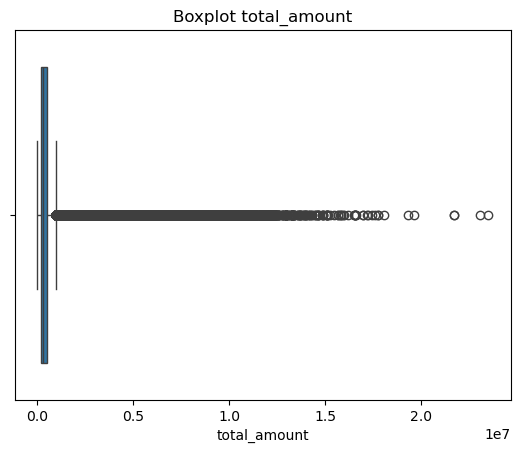

In [28]:
sns.boxplot(x=transactions['total_amount'])
plt.title('Boxplot total_amount')
plt.show()


In [29]:
Q1 = transactions['total_amount'].quantile(0.25)
Q3 = transactions['total_amount'].quantile(0.75)
IQR = Q3 - Q1

outliers_amount = transactions[(transactions['total_amount'] < Q1 - 1.5*IQR) | 
                               (transactions['total_amount'] > Q3 + 1.5*IQR)]

print(f"Total anomalies in total_amount: {len(outliers_amount)}")


Всего аномалий в total_amount: 103329


In [33]:
transactions["shipment_date_limit"] = pd.to_datetime(transactions["shipment_date_limit"])
transactions["shipment_date_limit"] = transactions["shipment_date_limit"].dt.floor("s")

In [34]:
transactions["days_to_shipment"] = (
    (transactions["shipment_date_limit"] - transactions["created_at"]).dt.days
)

In [37]:
pivot = transactions.pivot_table(
    index='days_to_shipment',
    values='booking_id',
    aggfunc='count'
)
print(pivot.sort_values('days_to_shipment'))

                  booking_id
days_to_shipment            
1                     163815
2                     170978
3                     169861
4                     171208
5                     169879
6                       6843


In [39]:
quantiles = [0, 0.01, 0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.97, 0.99, 0.995, 0.997, 0.999, 1]
q_values = transactions["total_amount"].quantile(quantiles)
for q, v in q_values.items():
    print(f"{int(q*100)}%  ->  {v}")

0%  ->  10898.0
1%  ->  76037.83
5%  ->  115914.15
25%  ->  203793.75
50%  ->  302989.0
75%  ->  514702.25
90%  ->  1150284.7000000002
95%  ->  1889932.1499999976
97%  ->  2538715.8900000006
99%  ->  4237350.830000004
99%  ->  5406337.544999997
99%  ->  6353511.144000102
99%  ->  8446203.194000276
100%  ->  23504487.0


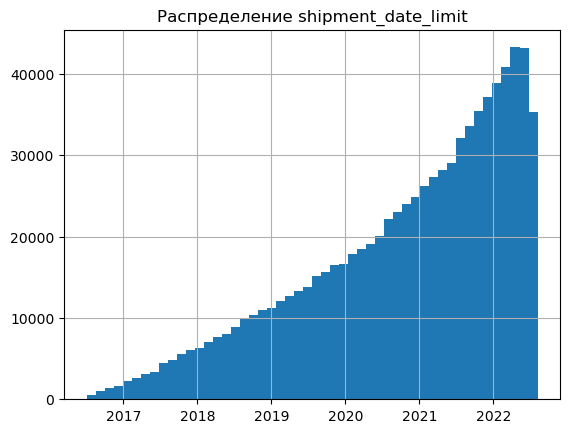

In [41]:
transactions['shipment_date_limit'].hist(bins=50)
plt.title('Distribution shipment_date_limit')
plt.show()


2. product.csv

In [44]:
rows = []
for idx, row in transactions.iterrows():
    booking_id = row['booking_id']
    products = row['product_metadata']  # list of dictionaries

    # If it is stored as a string, convert it to a list of dictionaries
    if isinstance(products, str):
        products = ast.literal_eval(products)
    
    for prod in products:
        product_id = prod.get('product_id')
        quantity = prod.get('quantity')
        item_price = prod.get('item_price')
        product_amount = quantity * item_price
        rows.append({
            'booking_id': booking_id,
            'product_id': prod['product_id'],
            'quantity': prod['quantity'],
            'item_price': prod['item_price'],
            'product_amount': prod['quantity'] * prod['item_price']
        })

# Create DataFrame
transactions_prods = pd.DataFrame(rows)


In [45]:
with open('product.csv', encoding='utf-8', errors='ignore') as f:
    lines = ['\t'.join(line.split(',')[:10]).replace('\n',' ').replace('\r',' ') for line in f]

products = pd.read_csv(pd.io.common.StringIO('\n'.join(lines)), sep='\t', quotechar='"')

products.sample(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
9611,45383,Women,Footwear,Shoes,Flats,Brown,Winter,2012.0,Casual,Rocia Women Brown & Gold Sandals
26949,16504,Men,Apparel,Bottomwear,Jeans,Blue,Fall,2011.0,Casual,Locomotive Men Washed Blue Jeans
22708,57737,Women,Personal Care,Lips,Lip Care,Red,Spring,2017.0,NaN,Lotus Herbals Strawberry Lip Balm
14868,56170,Women,Personal Care,Makeup,Kajal and Eyeliner,Mauve,Spring,2017.0,Casual,Colorbar Color Intense Mauve Mermaid Liquid Ey...
38311,22802,Men,Apparel,Topwear,Shirts,Purple,Fall,2011.0,Casual,Locomotive Men Purple Check Shirt
19110,16945,Women,Accessories,Eyewear,Sunglasses,Pink,Winter,2016.0,Casual,Image Women Classic Eyewear Pink Sunglasses
35419,28996,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,Status Quo Men Printed Blue T-shirt
41363,9045,Men,Footwear,Flip Flops,Flip Flops,Black,Fall,2011.0,Casual,Provogue Men Ean Black Flip Flops
28548,3647,Men,Footwear,Shoes,Casual Shoes,White,Summer,2012.0,Casual,Fila Men's Paramount White Navy Shoe
7756,32421,Men,Apparel,Topwear,Tshirts,Yellow,Summer,2012.0,Casual,ADIDAS Men Printed Yellow T-shirt


In [80]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   44446 non-null  int64  
 1   gender               44446 non-null  object 
 2   masterCategory       44446 non-null  object 
 3   subCategory          44446 non-null  object 
 4   articleType          44446 non-null  object 
 5   baseColour           44431 non-null  object 
 6   season               44425 non-null  object 
 7   year                 44445 non-null  float64
 8   usage                44129 non-null  object 
 9   productDisplayName   44446 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [82]:
products.describe()

,id,year
count,44446.000000,44445.000000
mean,29692.631350,2012.805940
std,17048.234982,2.126401
min,1163.000000,2007.000000
25%,14770.250000,2011.000000
50%,28609.500000,2012.000000
75%,44678.750000,2015.000000
max,60000.000000,2019.000000


In [46]:
missing_products = transactions_prods[~transactions_prods['product_id'].isin(products['id'])]
print(f"product_id, missing in products: {len(missing_products)}")

product_id, которых нет в таблице products: 0


In [47]:
# агрегируем сумму товаров по booking_id
products_sum = transactions_prods.groupby('booking_id')['product_amount'].sum().reset_index()
products_sum.rename(columns={'product_amount': 'products_total'}, inplace=True)
products_sum.head()


,booking_id,products_total
0,00000ebf-7116-43f2-bbf7-f33bf45f2574,1082151
1,0000121c-49bc-45ac-a91b-e59baaa75fb0,64894
2,000019e9-c897-4c9c-aa7f-5608f890d417,399291
3,000039e2-b270-4a64-8eea-6e0d64c2b66d,390872
4,0000524e-0891-4124-ab43-48cffec94c4d,131010


In [58]:
# соединяем с основной таблицей транзакций
check_sum = transactions[['booking_id', 'total_amount', 'shipment_fee', 'promo_amount']].merge(products_sum, on='booking_id', how='left')
# проверяем разницу
check_sum['difference'] = check_sum['total_amount']-check_sum['shipment_fee']+check_sum['promo_amount'] - check_sum['products_total']
check_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   booking_id      852584 non-null  object
 1   total_amount    852584 non-null  int64 
 2   shipment_fee    852584 non-null  int64 
 3   promo_amount    852584 non-null  int64 
 4   products_total  852584 non-null  int64 
 5   difference      852584 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 39.0+ MB


In [60]:
check_sum['difference'].value_counts()

difference
0    852584
Name: count, dtype: int64

In [62]:
transactions_prods.isnull().sum()


booking_id        0
product_id        0
quantity          0
item_price        0
product_amount    0
dtype: int64

In [64]:
neg_qty = transactions_prods[transactions_prods['quantity'] < 0]
neg_price = transactions_prods[transactions_prods['item_price'] < 0]

print(f"Negative quantity: {len(neg_qty)}")
print(f"Negative item_price: {len(neg_price)}")


Отрицательных quantity: 0
Отрицательных item_price: 0


In [66]:
wrong_amount = transactions_prods[
    transactions_prods['product_amount'] != transactions_prods['quantity'] * transactions_prods['item_price']
]

print(f"Wrong product_amount: {len(wrong_amount)}")


Неверный product_amount: 0


In [68]:
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    return outliers

out_amount = find_outliers(transactions_prods, 'product_amount')
out_price = find_outliers(transactions_prods, 'item_price')
out_qty = find_outliers(transactions_prods, 'quantity')

print(len(out_amount), len(out_price), len(out_qty))


110583 24510 215950


In [70]:
duplicates = transactions_prods[transactions_prods.duplicated(subset=['booking_id', 'product_id'], keep=False)]
print(f"Duplicates: {len(duplicates)}")


Дубликаты: 72


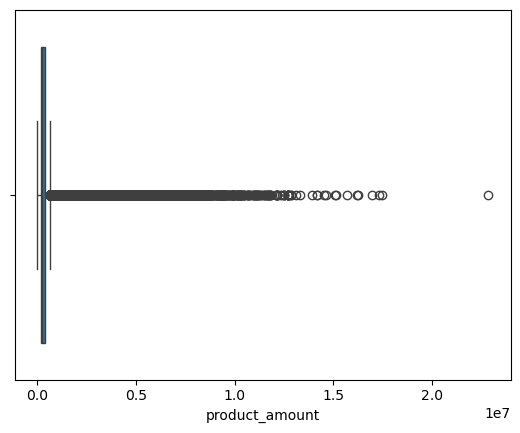

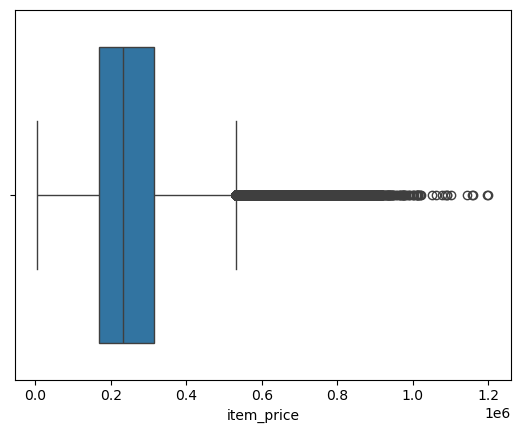

In [72]:
sns.boxplot(x=transactions_prods['product_amount'])
plt.show()

sns.boxplot(x=transactions_prods['item_price'])
plt.show()


In [86]:
pivot = products.pivot_table(
    index='baseColour',
    values='id',
    aggfunc='count'
)
print(pivot.sort_values('baseColour'))

                     id
baseColour             
Beige               749
Black              9732
Blue               4922
Bronze               95
Brown              3494
Burgundy             45
Charcoal            228
Coffee Brown         31
Copper               86
Cream               390
Fluorescent Green     5
Gold                629
Green              2116
Grey               2741
Grey Melange        146
Khaki               139
Lavender            162
Lime Green            6
Magenta             129
Maroon              581
Mauve                29
Metallic             43
Multi               394
Mushroom Brown       16
Mustard              97
Navy Blue          1791
Nude                 23
Off White           182
Olive               410
Orange              530
Peach               195
Pink               1861
Purple             1643
Red                2458
Rose                 28
Rust                 66
Sea Green            22
Silver             1090
Skin                179
Steel           

In [88]:
print(products['baseColour'].nunique())

46


In [90]:
pivot = products.pivot_table(
    index='gender',
    values='id',
    aggfunc='count'
)
print(pivot.sort_values('gender'))

           id
gender       
Boys      830
Girls     655
Men     22165
Unisex   2164
Women   18632


In [96]:
counts = products["season"].value_counts(dropna=False).sort_index()
print(counts)

season
Fall      11445
Spring     2985
Summer    21476
Winter     8519
NaN          21
Name: count, dtype: int64


In [98]:
counts = products["usage"].value_counts(dropna=False).sort_index()
print(counts)

usage
Casual          34414
Ethnic           3208
Formal           2359
Home                1
Party              29
Smart Casual       67
Sports           4025
Travel             26
NaN               317
Name: count, dtype: int64


In [100]:
products["year"] = products["year"].astype("Int64")
counts = products["year"].value_counts(dropna=False).sort_index()
print(counts)

year
2007        2
2008        7
2009       20
2010      846
2011    13689
2012    16290
2013     1213
2014      236
2015     2780
2016     6007
2017     2917
2018      405
2019       33
<NA>        1
Name: count, dtype: Int64


3. click_stream.csv


In [102]:
click_stream = pd.read_csv('click_stream.csv')
click_stream.sample(5)


,session_id,event_name,event_time,event_id,traffic_source,event_metadata
8895511,c5df8002-01bc-4de5-b575-c3cf21e47816,SCROLL,2022-05-22T14:24:53.014504Z,01c1541a-5513-4349-965d-18158e53164b,MOBILE,NaN
12215043,c38b88c9-09e7-4aab-ab26-a2f3d9f7f5c3,ADD_TO_CART,2021-09-15T00:11:27.088533Z,ed4ee14c-1642-4a02-b554-56b45a9d9faf,MOBILE,"{'product_id': 18411, 'quantity': 1, 'item_pri..."
5428329,850e307e-2e55-4620-ac7c-04cb6d75cb68,HOMEPAGE,2021-11-07T18:57:54.122814Z,d64679fe-7928-4a70-b25c-0d14431340cd,MOBILE,NaN
12647714,7a4b86b0-6fb4-47c4-87a9-efc2522e0787,PROMO_PAGE,2021-01-27T19:13:09.657567Z,5638cdc4-8136-4f09-9f24-0e034eada96c,MOBILE,NaN
662728,b127cb70-7cce-4f37-b79a-552e0120ed75,CLICK,2018-10-19T11:34:11.436093Z,7753faeb-cac3-4684-8065-fcf7526430d5,MOBILE,NaN


In [103]:
click_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [104]:
click_stream.describe()


,session_id,event_name,event_time,event_id,traffic_source,event_metadata
count,12833602,12833602,12833602,12833602,12833602,4289540
unique,895203,9,12814223,12833602,2,2006748
top,65383bfb-5535-445f-ab52-aec4658eb0bd,CLICK,2021-05-02T11:28:41.047631Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,{'payment_status': 'Success'}
freq,650,2498038,451,1,11548304,815962


In [105]:
click_stream.isnull().sum()

session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    8544062
dtype: int64

In [106]:
click_stream['event_id'].nunique()

12833602

In [110]:
click_stream['event_time'] = pd.to_datetime(click_stream['event_time'])
click_stream['event_time'] = click_stream['event_time'].dt.floor("s")

In [116]:
pivot = (
    click_stream
    .groupby('event_name')
    .agg(
        event_count=('event_id', 'count'),           
        session_unique=('session_id', 'nunique')     
    )
    .assign(ratio=lambda x: (x['event_count'] / x['session_unique']).round(1))  
    .reset_index()
)

print(pivot.sort_values('event_name'))

    event_name  event_count  session_unique  ratio
0    ADD_PROMO       326535          326535    1.0
1  ADD_TO_CART      1937157          872061    2.2
2      BOOKING       852582          852582    1.0
3        CLICK      2498038          671476    3.7
4     HOMEPAGE      2487126          895203    2.8
5  ITEM_DETAIL      1290396          520780    2.5
6   PROMO_PAGE       604931          351079    1.7
7       SCROLL      1663571          572486    2.9
8       SEARCH      1173266          490846    2.4


In [117]:
#check that there is 1 ADD_PROMO per unique session
col = click_stream[click_stream['event_name']=='ADD_PROMO']['session_id']

total = len(col)
unique = col.nunique(dropna=True)
missing = col.isna().sum()

print("Total values:", total)
print("Unique:", unique)
print("Empty:", missing)

Всего значений: 326535
Уникальных: 326535
Пустых: 0


In [118]:
# check that there is 1 BOOKING per unique session
col = click_stream[click_stream['event_name']=='ADD_PROMO']['session_id']

total = len(col)
unique = col.nunique(dropna=True)
missing = col.isna().sum()

print("Total values:", total)
print("Unique:", unique)
print("Empty:", missing)

Всего значений: 326535
Уникальных: 326535
Пустых: 0


4. customer.csv

In [122]:
customers = pd.read_csv('customer.csv')
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [124]:
customers.describe()


,customer_id,home_location_lat,home_location_long
count,100000.000000,100000.000000,100000.000000
mean,50000.500000,-5.106390,110.936081
std,28867.657797,3.088183,6.343363
min,1.000000,-10.845002,95.275319
25%,25000.750000,-7.372650,106.860628
50%,50000.500000,-6.240087,110.162010
75%,75000.250000,-3.092254,113.171187
max,100000.000000,5.818355,140.993119


In [126]:
counts1 = customers["gender"].value_counts(dropna=False).sort_index()
counts2 = customers["device_type"].value_counts(dropna=False).sort_index()
counts3 = customers["device_version"].value_counts(dropna=False).sort_index()
counts4 = customers["home_location"].value_counts(dropna=False).sort_index()
print(counts1,'\n')
print(counts2,'\n')
print(counts3,'\n')
print(counts4)

gender
F    64230
M    35770
Name: count, dtype: int64 

device_type
Android    76637
iOS        23363
Name: count, dtype: int64 

device_version
Android 1.0                                  1225
Android 1.1                                  1223
Android 1.5                                  1259
Android 1.6                                  1244
Android 10                                   1225
                                             ... 
iPhone; CPU iPhone OS 5_1_1 like Mac OS X     992
iPhone; CPU iPhone OS 6_1_6 like Mac OS X     902
iPhone; CPU iPhone OS 7_1_2 like Mac OS X    1022
iPhone; CPU iPhone OS 9_3_5 like Mac OS X     907
iPhone; CPU iPhone OS 9_3_6 like Mac OS X     968
Name: count, Length: 86, dtype: int64 

home_location
Aceh                     263
Bali                    1451
Bangka Belitung          250
Banten                   377
Bengkulu                 654
Gorontalo                348
Jakarta Raya           18715
Jambi                    385
Jawa Barat        

In [132]:
customers["birthdate"] = pd.to_datetime(customers["birthdate"], errors="coerce")
customers["birth_year"] = customers["birthdate"].dt.year
customers["birth_year"] = customers["birth_year"].fillna("Unknown")

counts = (
    customers.groupby("birth_year")["customer_id"]
      .count()
      .reset_index(name="count_customers")
)
counts_sorted = counts.sort_values(
    by="birth_year",
    key=lambda col: pd.to_numeric(col, errors="coerce").fillna(9999)
)

print(counts_sorted)

    birth_year  count_customers
0         1954                1
1         1955                4
2         1957                2
3         1958                1
4         1959                1
..         ...              ...
57        2012              110
58        2013               60
59        2014               23
60        2015                9
61        2016                4

[62 rows x 2 columns]
